In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [4]:
df.drop("SNo" , axis = 1 , inplace = True)

In [6]:
df.columns = ["A" , "B" , "C"]

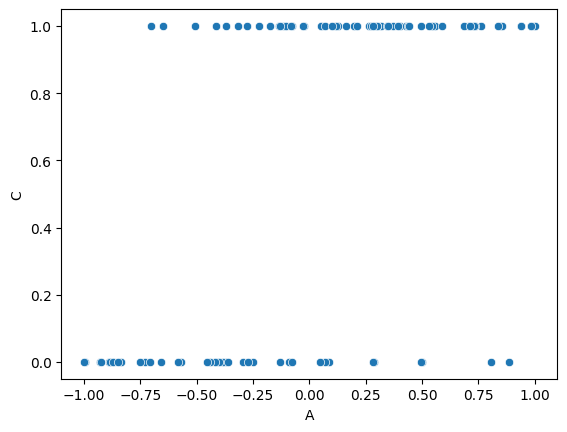

In [7]:
sns.scatterplot(x="A" , y="C" , data=df)
plt.show()

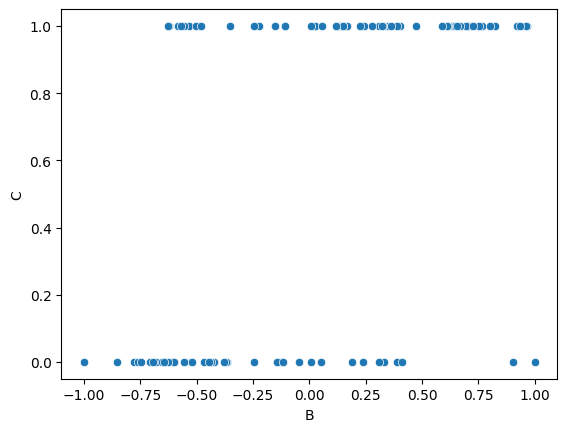

In [8]:
sns.scatterplot(x="B" , y="C" , data=df)
plt.show()

In [9]:
# both are almost same so we will take any of the one and apply binary logistic regression for single input


In [10]:
x  = df['A'].values.reshape(-1 , 1)
y = df['C']

In [22]:
# spliting the data into the training and testing part

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 47)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 1)
(30, 1)
(70,)
(30,)


In [23]:
# prompt: generate the simple logistic regression model , train and test the data and return the report of accuracy , f1 score and percision

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report

model = LogisticRegression()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test , y_pred))
print("Accuracy score : " , accuracy_score(y_test , y_pred))


              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.74      0.93      0.82        15

    accuracy                           0.80        30
   macro avg       0.82      0.80      0.80        30
weighted avg       0.82      0.80      0.80        30

Accuracy score :  0.8


In [25]:
print("training accuracy" , model.score(x_train , y_train)*100)
print("testing accuracy" , model.score(x_test , y_test)*100)

training accuracy 80.0
testing accuracy 80.0


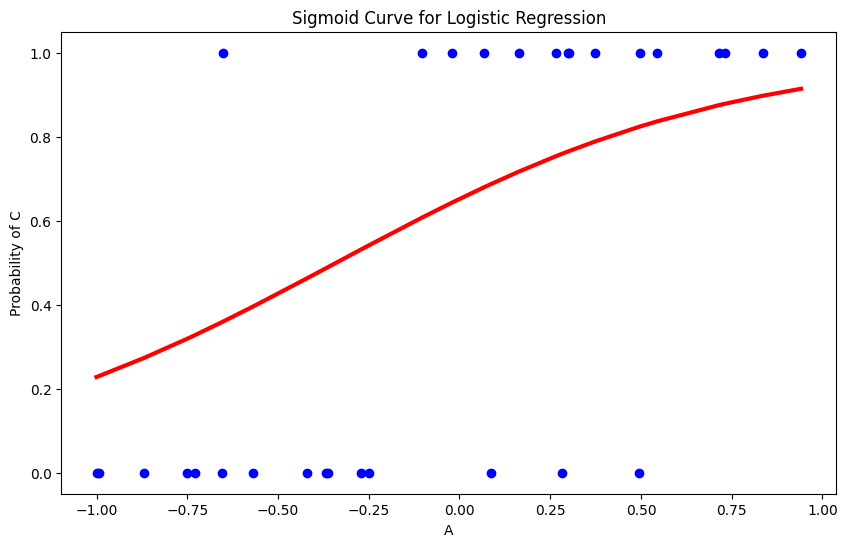

In [27]:
# prompt: draw the graph to show the sigmoid line  for this model

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='blue')
X_test_sorted = np.sort(x_test, axis=0)
y_pred_proba = model.predict_proba(X_test_sorted)[:, 1]
plt.plot(X_test_sorted, y_pred_proba, color='red', linewidth=3)
plt.xlabel('A')
plt.ylabel('Probability of C')
plt.title('Sigmoid Curve for Logistic Regression')
plt.show()


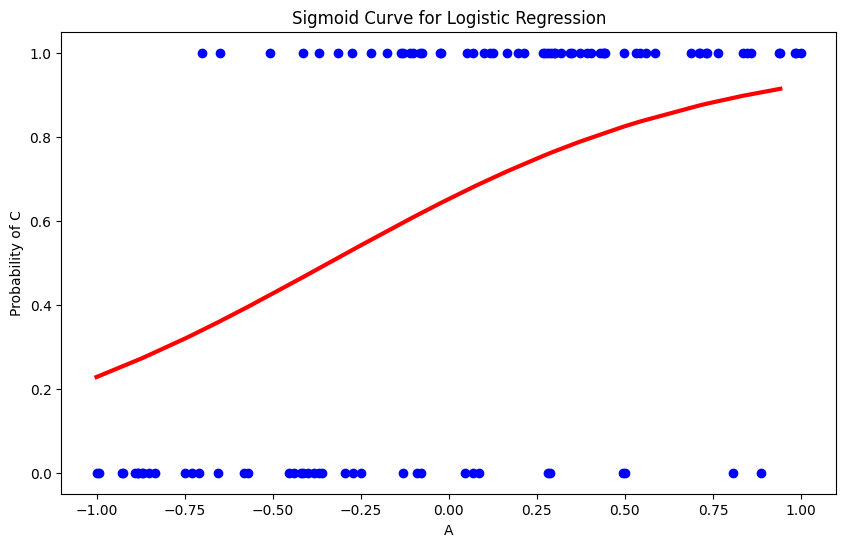

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.scatter("A", "C", data=df, color='blue')
X_test_sorted = np.sort(x_test, axis=0)
y_pred_proba = model.predict_proba(X_test_sorted)[:, 1]
plt.plot(X_test_sorted, y_pred_proba, color='red', linewidth=3)
plt.xlabel('A')
plt.ylabel('Probability of C')
plt.title('Sigmoid Curve for Logistic Regression')
plt.show()